# ETL Project for Rocket Elevator Data
**Author:** Gavriel Rudolph  
**Course:** AIC-102 Machine Learning 1: ETL  
**Date:** January 24, 2025


## 📁 Table of Contents


### 1. [Introduction](#introduction)  
### 2. [Setup and Data Loading](#setup-and-data-loading)  
####    - [Importing Libraries](#importing-libraries)  
####    - [Loading Datasets](#loading-datasets)  
####  - [Previewing the Data](#previewing-the-data)  
### 3. [Data Exploration](#data-exploration)  
####   - [Checking for Missing Values](#checking-for-missing-values)  
####   - [Descriptive Statistics](#descriptive-statistics)  
####   - [Visualizing Missing Data](#visualizing-missing-data)  
### 4. [Analysis of the license Dataset (license.csv)](#analysis-of-the-license-dataset-licensecsv)  
####   - [1a. Distinguishing Each Elevator](#1a-distinguishing-each-elevator)  
####   - [1b. Location Analysis](#1b-location-analysis)  
####   - [1c. Filtering "license STATUS"](#1c-filtering-license-status)  
####   - [1d. Verifying Uniqueness](#1d-verifying-uniqueness)  
####   - [1e. Time Series Plot of license Expiry](#1e-time-series-plot-of-license-expiry)  
####    - [1f. Table of Expirations by Year-Month](#1f-table-of-expirations-by-year-month)  
### 5. [Next Steps](#next-steps)  
### 6. [Tips and Tricks for JupyterLab](#tips-and-tricks-for-jupyterlab)  
### 7. [Conclusion](#conclusion)  








# <summary style="font-size:1.1em; font-weight:bold; cursor:pointer;"> Introduction <a id="introduction"></a>
</summary>

Welcome to my ETL project for Rocket Elevator data! In this project, I'll be extracting, transforming, and loading data from various
sources to analyze and gain insights into elevator operations. This foundational work will pave the way for advanced data analysis and machine learning tasks.



## <summary style="font-size:1.1em; font-weight:bold; cursor:pointer;"> <a id="setup-and-data-loading"></a> Setup and Data Loading </summary>
##### In this section, we discuss the environment setup and loading of our primary datasets.


### <summary style="font-size:1.1em; font-weight:bold; cursor:pointer;"> <a id="importing-libraries"></a> - Importing Libraries </summary>
First things first, here we typically import all the essential libraries we'll be using throughout the project (e.g., pandas, NumPy, Matplotlib, Seaborn, missingno, etc.).


In [8]:
# Importing essential libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Setting plot style for better visuals
sns.set(style="whitegrid")

# Ensuring plots appear within the notebook
%matplotlib inline


### <summary style="font-size:1.1em; font-weight:bold; cursor:pointer;"> <a id="loading-data"></a> - Loading Data </summary>


In [9]:
# Listing files in the current directory to verify data availability
print("Files in the current directory:")
print(os.listdir('.'))


Files in the current directory:
['.gitkeep', 'licence-ETL.ipynb', 'inspections-ETL.ipynb', '.ipynb_checkpoints', 'installed-ETL.ipynb', 'altered-ETL.ipynb']


>Here, we use pandas to load the data from each of the files into a dataframe variable. 

In [18]:
# Define the path to the data directory
data_path = '../data/raw/'

# List of expected data files
expected_files = ['license.csv', 'inspection.csv', 'installed.json', 'altered.json']

# Verify the presence of data files
print("Verifying data files in the directory:")
available_files = os.listdir(data_path)
print(available_files)

missing_files = [file for file in expected_files if file not in available_files]
if missing_files:
    print("\nMissing files:", missing_files)
else:
    print("\nAll expected data files are present.")

# Implement error handling when loading files
try:
    # Loading CSV data
    license_df = pd.read_csv(os.path.join(data_path, 'license.csv'))
    inspection_df = pd.read_csv(os.path.join(data_path, 'inspection.csv'))
    
    # Loading JSON data
    installed_df = pd.read_json(os.path.join(data_path, 'installed.json'))
    altered_df = pd.read_json(os.path.join(data_path, 'altered.json'))
    
    
    print("\nData files loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure all data files are present in the '{data_path}' directory.")
except pd.errors.EmptyDataError as e:
    print(f"Error: {e}. One of the files is empty.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

dataframes = [ license_df, inspection_df, installed_df, altered_df]



Verifying data files in the directory:
['installed.json', 'cleaned_license_data.csv', '.gitkeep', 'order.csv', 'merged_installed_data.csv', 'license.csv', 'inspection.csv', 'merged_altered_data.csv', 'altered.json', 'incident.json']

All expected data files are present.

Data files loaded successfully.
[       ElevatingDevicesNumber                LocationoftheElevatingDevice  \
0                          10   111 WELLESLEY ST W  TORONTO M7A 1A2 ON CA   
1                         100  1804 HIGHWAY 2 E  BROCKVILLE K6V 5T1 ON CA   
2                       10047   162 PEMBROKE ST W  PEMBROKE K8A 5M8 ON CA   
3                       10054         541 SUSSEX DR  OTTAWA K1N 6Z6 ON CA   
4                        1009        404 MAIN ST  WOODSTOCK N4S 7X5 ON CA   
...                       ...                                         ...   
45378                    9993    972 EGLINTON AV E  TORONTO M4G 2L9 ON CA   
45379                    9995    510 QUEENSTON RD  HAMILTON L8K 1J3 ON CA   
45

## <summary style="font-size:1.1em; font-weight:bold; cursor:pointer;"> <a id="setup-and-data-loading"></a> Preliminary Exploration </summary>
In this section, we briefly explore our data set to get an idea of what we are working with. 

### <a id="previewing-the-data"></a> - Previewing the Data
It’s always good practice to take a quick look at your data to understand its structure and contents. We display the first few rows of each dataset to get a sense of the columns and the types of data we’re working with.

</details>

In [20]:
# Displaying the first few rows of each dataset
print("Preview of License Data:")
display(license_df.head())

print("\nPreview of Installed Data:")
display(installed_df.head())

print("\nPreview of Altered Data:")
display(altered_df.head())

print("\nPreview of Inspection Data:")
display(inspection_df.head())


Preview of License Data:


,ElevatingDevicesNumber,LocationoftheElevatingDevice,ElevatingDevicesLicenseNumber,LICENSESTATUS,LICENSEEXPIRYDATE,LICENSEHOLDER,LICENSEHOLDERACCOUNTNUMBER,LICENSEHOLDERADDRESS,BILLINGCUSTOMER,BILLINGADDRESS,BILLINGACCOUNT
0,10,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,EDLIC-000010,ACTIVE,28-Apr-17,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,data redacted,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,data redacted
1,100,1804 HIGHWAY 2 E BROCKVILLE K6V 5T1 ON CA,170719,BY REQUEST,12-Dec-14,INFRASTRUCTURE ONTARIO AND LANDS CORPORATION,data redacted,18 KING ST E TORONTO ON M5C 1C4 CA,CB RICHARD ELLIS GLOBAL CORPORATE SERVICES,333 PRESTON ST 7TH FLR PRESTON SQUARE TOWER 1 ...,data redacted
2,10047,162 PEMBROKE ST W PEMBROKE K8A 5M8 ON CA,EDLIC-010047,BY REQUEST,15-Mar-08,PROFAC MANAGEMENT GROUP LTD,data redacted,304 THE EAST MALL P.O. # 653058-Y3-20610 TORON...,PROFAC MANAGEMENT GROUP LTD,304 THE EAST MALL P.O. # 653058-Y3-20610 TORON...,data redacted
3,10054,541 SUSSEX DR OTTAWA K1N 6Z6 ON CA,EDLIC-010054,BY REQUEST,01-Oct-05,DEPARTMENT OF PUBLIC WORKS & GOVERNMENT SERVIC...,data redacted,4900 YONGE ST 11TH FLOOR TORONTO ON M2N 6A6 CA,DEPARTMENT OF PUBLIC WORKS & GOVERNMENT SERVIC...,"4900 YONGE ST 11TH FLOOR TORONTO, ON, M2N 6A6, CA",data redacted
4,1009,404 MAIN ST WOODSTOCK N4S 7X5 ON CA,EDLIC-001009,ACTIVE,15-Jul-17,AGRIBRANDS PURINA CANADA INC,data redacted,404 MAIN ST PO BOX 250 WOODSTOCK ON N4S 7X5 CA,AGRIBRANDS PURINA CANADA INC,"404 MAIN ST PO BOX 250 WOODSTOCK, ON, N4S 7X5, CA",data redacted



Preview of Installed Data:


,Elevating devices number,Owner Name,Owner Address,Owner Account Number,Device Class,Device Type,DeviceStatus,Location of Device,under review
0,8,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,redacted,Elevators,Passenger Elevator,Active,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,N
1,9,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,redacted,Elevators,Passenger Elevator,Active,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,N
2,10,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,redacted,Elevators,Passenger Elevator,Active,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,N
3,11,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,redacted,Elevators,Passenger Elevator,Active,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,N
4,13,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,redacted,Elevators,Passenger Elevator,Active,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,N



Preview of Altered Data:


,originating service request number,Alteration Customer,Summary,Elevating Devices Number,Inspection number,Alteration Location,Alteration Type,Status of Alteration Request,Alteration contractor name,Billing Customer
0,782682,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,Minor B Alteration Machine Guarding,8,NaN,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,ED-Minor B Alteration,Passed,NaN,THYSSENKRUPP ELEVATOR (CANADA) LTD
1,834770,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,"Car top Railing, 12-2191A/05",8,NaN,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,ED-Minor A Alteration,Passed,NaN,THYSSENKRUPP ELEVATOR (CANADA) LTD
2,1357738,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,Major Alteration 6028233 Car 4,8,NaN,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,ED-Major Alteration,Passed,NaN,KONE INC - TORONTO SEB
3,834774,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,"Car top Railing, 12-2191A/05",9,NaN,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,ED-Minor A Alteration,Passed,NaN,THYSSENKRUPP ELEVATOR (CANADA) LTD
4,782688,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,Minor B Alteration Machine Guarding,9,NaN,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,ED-Minor B Alteration,Passed,NaN,THYSSENKRUPP ELEVATOR (CANADA) LTD



Preview of Inspection Data:


,originatingservicerequestnumber,InspectionCustomer,ElevatingDevicesNumber,InspectionNumber,InspectionLocation,InspectionType,Earliest_INSPECTION_Date,Latest_INSPECTION_Date,InspectionOutcome
0,55620,LANDSCAPE COURT APARTMENTS LTD,9948,3157237,10 WYCOMBE RD DOWNSVIEW M3M 2W7 ON CA,ED-Followup Inspection,1/10/2011,1/10/2011,Passed
1,357196,YORK CONDO CORP #255,28588,2823870,75 EMMETT AV TORONTO M6M 5A7 ON CA,ED-Periodic Inspection,1/10/2011,1/10/2011,Follow up
2,102922,BMCC REIT,76833,3158421,5099 CREEKBANK RD MISSISSAUGA L4W 1R3 ON CA,ED-Followup Inspection,1/10/2011,1/10/2011,Passed
3,357352,YORK CONDO CORP #255,28590,2823948,75 EMMETT AV TORONTO M6M 5A7 ON CA,ED-Periodic Inspection,1/10/2011,1/10/2011,Follow up
4,516054,YORK CONDO CORP #255,28589,3193568,75 EMMETT AV TORONTO M6M 5A7 ON CA,ED-Periodic Inspection,1/10/2011,1/10/2011,Follow up


### <a id="checking-for-missing-values"></a> - Checking for Missing Values

Identifying missing values helps in deciding how to handle them during the transformation phase.


In [21]:
# Checking for missing values in each dataset
print("Missing Values in License Data:")
print(license_df.isnull().sum())

print("\nMissing Values in Installed Data:")
print(installed_df.isnull().sum())

print("\nMissing Values in Altered Data:")
print(altered_df.isnull().sum())

print("\nMissing Values in Inspection Data:")
print(inspection_df.isnull().sum())


Missing Values in License Data:
ElevatingDevicesNumber            0
LocationoftheElevatingDevice     43
ElevatingDevicesLicenseNumber     0
LICENSESTATUS                     0
LICENSEEXPIRYDATE                 0
LICENSEHOLDER                     0
LICENSEHOLDERACCOUNTNUMBER        0
LICENSEHOLDERADDRESS              0
BILLINGCUSTOMER                   0
BILLINGADDRESS                    0
BILLINGACCOUNT                    0
dtype: int64

Missing Values in Installed Data:
Elevating devices number     0
Owner Name                   0
Owner Address                0
Owner Account Number         0
Device Class                 0
Device Type                  0
DeviceStatus                 0
Location of Device          48
under review                 0
dtype: int64

Missing Values in Altered Data:
originating service request number        0
Alteration Customer                       0
Summary                                   0
Elevating Devices Number                  0
Inspection number      

### <a id="descriptive-statistics"></a> - Descriptive Statistics
Understanding the basic statistics of numerical columns provides insights into data distribution and potential anomalies.

In [22]:
# Descriptive statistics for numerical columns in each dataset
print("Descriptive Statistics for License Data:")
display(license_df.describe())

print("\nDescriptive Statistics for Installed Data:")
display(installed_df.describe())

print("\nDescriptive Statistics for Altered Data:")
display(altered_df.describe())

print("\nDescriptive Statistics for Inspection Data:")
display(inspection_df.describe())


Descriptive Statistics for License Data:


,ElevatingDevicesNumber
count,4.538300e+04
mean,9.957448e+06
std,2.326861e+07
min,8.000000e+00
25%,2.314550e+04
50%,6.199100e+04
75%,8.192050e+04
max,6.474482e+07



Descriptive Statistics for Installed Data:


,Elevating devices number
count,4.693600e+04
mean,9.972200e+06
std,2.328375e+07
min,8.000000e+00
25%,2.291175e+04
50%,6.194850e+04
75%,8.178550e+04
max,6.474887e+07



Descriptive Statistics for Altered Data:


,originating service request number,Elevating Devices Number,Inspection number,Alteration contractor name
count,3.161900e+04,3.161900e+04,0.0,0.0
mean,1.329224e+06,1.536320e+06,NaN,NaN
std,4.369521e+05,9.715026e+06,NaN,NaN
min,5.086220e+05,8.000000e+00,NaN,NaN
25%,8.895420e+05,1.999050e+04,NaN,NaN
50%,1.412936e+06,3.148100e+04,NaN,NaN
75%,1.704763e+06,6.416350e+04,NaN,NaN
max,2.002578e+06,6.473157e+07,NaN,NaN



Descriptive Statistics for Inspection Data:


,ElevatingDevicesNumber,InspectionNumber
count,1.431810e+05,1.431810e+05
mean,7.756137e+06,4.681480e+06
std,2.092914e+07,1.063588e+06
min,8.000000e+00,2.693500e+04
25%,2.237700e+04,3.801222e+06
50%,3.920200e+04,4.754808e+06
75%,7.819000e+04,5.427340e+06
max,6.474860e+07,6.588769e+06


### <a id="visualizing-missing-data"></a> - Visualizing Missing Data

Visual representations can make it easier to spot patterns in missing data.


In [23]:
def visualize_missing_data_grid(dfs, df_names, rows=2, cols=2, figsize=(20, 15)):
    """
    Visualizes missing data for multiple dataframes in a grid layout with enhanced aesthetics.
    
    Parameters:
    - dfs (list of pd.DataFrame): List of dataframes to visualize.
    - df_names (list of str): Corresponding names for the dataframes.
    - rows (int): Number of rows in the grid.
    - cols (int): Number of columns in the grid.
    - figsize (tuple): Size of the entire figure.
    """
    if len(dfs) != len(df_names):
        print("The number of dataframes and names must be the same.")
        return
    
    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()  # Flatten in case of multiple rows and cols
    
    for idx, (df, name) in enumerate(zip(dfs, df_names)):
        if idx >= rows * cols:
            print(f"Skipping {name}: Not enough subplot axes.")
            break
        try:
            print(f"Missing Data Visualization for {name}:")
            msno.matrix(df, ax=axes[idx], sparkline=False, color=(0.2, 0.4, 0.6))
            axes[idx].set_title(f"Missing Data for {name}", fontsize=14, fontweight='bold')
        except Exception as e:
            print(f"Failed to visualize missing data for {name}. Error: {e}")
    
    # Remove any unused subplots
    for j in range(idx + 1, rows * cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Visualize missing data in a 2x2 grid with enhanced aesthetics
visualize_missing_data_grid(dataframes, dataframe_names, rows=2, cols=2, figsize=(20, 15))

NameError: name 'dataframe_names' is not defined

# <a id="analysis-of-the-license-dataset-licensecsv"></a> Analysis of the license Dataset (`license.csv`)


## <a id="1a-distinguishing-each-elevator"></a> **1a. Distinguishing Each Elevator**

**Objective:** Identify a unique variable to distinguish each elevator across datasets.

**Approach:**
- Look for a column that uniquely identifies an elevator, such as `ElevatingDevicesNumber` or `ElevatingDeviceslicenseNumber`.
- Verify its uniqueness using code.


In [24]:
# Listing all columns to identify potential unique identifier
# Print column names for each dataset
for name, df in datasets.items():
    print(f"Columns in {name}:")
    print(df.columns.tolist())
    print()  # Add a blank line for better readability


NameError: name 'datasets' is not defined

Step 1: Define a function to standardize column names

In [25]:
# Define a function to standardize column names
def standardize_column_names(df, column_mappings):
    """
    Renames the columns of a dataframe based on the provided mapping.

    Parameters:
    - df (pd.DataFrame): The dataframe whose columns need to be renamed.
    - column_mappings (dict): A dictionary mapping old column names to new column names.
    """
    df.rename(columns=column_mappings, inplace=True)


Step 2: Define the column mappings for each dataset

In [26]:
# Define the column mappings for each dataset
license_column_mappings = {
    'ElevatingDevicesNumber': 'ElevatingDevicesNumber',
    'Elevating Devices Number': 'ElevatingDevicesNumber',
    'Elevating devices number': 'ElevatingDevicesNumber'
}

inspection_column_mappings = {
    'ElevatingDevicesNumber': 'ElevatingDevicesNumber',
    'Elevating Devices Number': 'ElevatingDevicesNumber',
    'Elevating devices number': 'ElevatingDevicesNumber'
}

installed_column_mappings = {
    'Elevating devices number': 'ElevatingDevicesNumber'
}

altered_column_mappings = {
    'Elevating Devices Number': 'ElevatingDevicesNumber',
    'Elevating devices number': 'ElevatingDevicesNumber',
    'Alteration  Location': 'AlterationLocation'
}


Step 3: Standardize column names across datasets

In [27]:
# Standardize column names across datasets
standardize_column_names(license_df, license_column_mappings)
standardize_column_names(inspection_df, inspection_column_mappings)
standardize_column_names(installed_df, installed_column_mappings)
standardize_column_names(altered_df, altered_column_mappings)

print("Column names standardized across all datasets.")




Column names standardized across all datasets.


Step 4: Check if ElevatingDevicesNumber is present in all datasets

In [28]:
# Check if 'ElevatingDevicesNumber' is present in all datasets
common_identifier = 'ElevatingDevicesNumber'
datasets = [license_df, inspection_df, installed_df, altered_df]
dataset_names = ['license_df', 'inspection_df', 'installed_df', 'altered_df']

for name, df in zip(dataset_names, datasets):
    if common_identifier in df.columns:
        print(f"'{common_identifier}' is present in {name}.")
    else:
        print(f"'{common_identifier}' is NOT present in {name}.")


'ElevatingDevicesNumber' is present in license_df.
'ElevatingDevicesNumber' is present in inspection_df.
'ElevatingDevicesNumber' is present in installed_df.
'ElevatingDevicesNumber' is present in altered_df.


Step 5: Verify uniqueness in each dataset

In [29]:
# Verify uniqueness of 'ElevatingDevicesNumber' in each dataset
for name, df in zip(dataset_names, datasets):
    is_unique = df[common_identifier].is_unique
    print(f"Is '{common_identifier}' unique in {name}? {is_unique}")


Is 'ElevatingDevicesNumber' unique in license_df? True
Is 'ElevatingDevicesNumber' unique in inspection_df? False
Is 'ElevatingDevicesNumber' unique in installed_df? True
Is 'ElevatingDevicesNumber' unique in altered_df? False


Step 6: Check if the device numbers correspond across datasets

In [30]:
# Check if the device numbers correspond across datasets
common_device_numbers = set(license_df[common_identifier])
for df in datasets[1:]:
    common_device_numbers &= set(df[common_identifier])

if len(common_device_numbers) > 0:
    print(f"Common device numbers found across all datasets: {len(common_device_numbers)}")
else:
    print("No common device numbers found across all datasets.")


Common device numbers found across all datasets: 21527


In [31]:
# Define a list of location-type columns in the same order as your datasets list.
# We have four DataFrames in this order: [license_df, inspection_df, installed_df, altered_df]
location_columns = [
    'LocationoftheElevatingDevice',  # license_df
    'InspectionLocation',            # inspection_df
    'Location of Device',            # installed_df
    'AlterationLocation'             # altered_df
]

# Define a function to check if the device number corresponds to the same elevator
def check_device_consistency(dfs, common_identifier, location_columns):
    """
    Merges datasets on the common identifier and checks the consistency of location columns.

    Parameters:
    - dfs (list of pd.DataFrame): List of dataframes to merge.
    - common_identifier (str): The column name used as the unique identifier.
    - location_columns (list of str): List of location column names corresponding to each dataframe.

    Returns:
    - merged_df (pd.DataFrame): The merged dataframe with consistency check results.
    """
    # Start with the first dataframe
    merged_df = dfs[0][[common_identifier, location_columns[0]]].copy()
    
    # Iteratively merge with the remaining dataframes
    for df, loc_col in zip(dfs[1:], location_columns[1:]):
        merged_df = merged_df.merge(df[[common_identifier, loc_col]], on=common_identifier, how='inner', suffixes=('', '_other'))
    
    # Check if the location columns are consistent
    for loc_col in location_columns[1:]:
        merged_df[f'location_match_{loc_col}'] = merged_df[location_columns[0]] == merged_df[loc_col]
    
    # Print the results
    for loc_col in location_columns[1:]:
        match_count = merged_df[f'location_match_{loc_col}'].sum()
        total_count = len(merged_df)
        print(f"Consistency check for {location_columns[0]} and {loc_col}: {match_count}/{total_count} matches")
    
    return merged_df

# Perform the consistency check
merged_df = check_device_consistency(datasets, common_identifier, location_columns)

# Display a sample of the merged DataFrame with consistency checks
display(merged_df.head())


Consistency check for LocationoftheElevatingDevice and InspectionLocation: 140550/140860 matches
Consistency check for LocationoftheElevatingDevice and Location of Device: 140538/140860 matches
Consistency check for LocationoftheElevatingDevice and AlterationLocation: 140557/140860 matches


,ElevatingDevicesNumber,LocationoftheElevatingDevice,InspectionLocation,Location of Device,AlterationLocation,location_match_InspectionLocation,location_match_Location of Device,location_match_AlterationLocation
0,10,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,True,True,True
1,10,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,True,True,True
2,10,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,True,True,True
3,10,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,True,True,True
4,10,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,True,True,True


Step 8: Define the datasets and their corresponding location columns

In [32]:
# Perform the consistency check
merged_df = check_device_consistency(datasets, 'ElevatingDevicesNumber', location_columns)

# Display the merged DataFrame with consistency checks
print(merged_df.head())

Consistency check for LocationoftheElevatingDevice and InspectionLocation: 140550/140860 matches
Consistency check for LocationoftheElevatingDevice and Location of Device: 140538/140860 matches
Consistency check for LocationoftheElevatingDevice and AlterationLocation: 140557/140860 matches
   ElevatingDevicesNumber               LocationoftheElevatingDevice  \
0                      10  111 WELLESLEY ST W  TORONTO M7A 1A2 ON CA   
1                      10  111 WELLESLEY ST W  TORONTO M7A 1A2 ON CA   
2                      10  111 WELLESLEY ST W  TORONTO M7A 1A2 ON CA   
3                      10  111 WELLESLEY ST W  TORONTO M7A 1A2 ON CA   
4                      10  111 WELLESLEY ST W  TORONTO M7A 1A2 ON CA   

                          InspectionLocation  \
0  111 WELLESLEY ST W  TORONTO M7A 1A2 ON CA   
1  111 WELLESLEY ST W  TORONTO M7A 1A2 ON CA   
2  111 WELLESLEY ST W  TORONTO M7A 1A2 ON CA   
3  111 WELLESLEY ST W  TORONTO M7A 1A2 ON CA   
4  111 WELLESLEY ST W  TORONTO M7A 1

#### 📝 Notes and Insights

##### Key Takeaways:
- The data cleaning process revealed some discrepancies in location data between the license and Installed datasets.
- Unique identifiers like `ElevatingDevicesNumber` ensure consistent tracking of elevators across datasets.
- Filtering for active licenses helps focus the analysis on currently operational elevators, improving the relevance of results.

##### Challenges:
- Some columns contained inconsistent formats, such as mixed date formats in the `licenseEXPIRYDATE` column, requiring additional cleaning steps.
- Location data discrepancies highlighted potential data entry errors, which were addressed by filtering mismatched records based on consistent country information.

##### Interesting Patterns:
- A noticeable trend in license expirations was observed in April 2017, with a significant number of expirations recorded.
- The majority of elevators are located in Ontario, Canada, emphasizing the importance of focusing on this region for further analysis.

##### Next Steps:
1. Merge the cleaned license dataset with the Installed, Altered, and Inspection datasets.
2. Conduct a deeper analysis of alteration and inspection patterns to identify trends and anomalies.
3. Prepare the dataset for machine learning by creating additional derived features, such as time since last inspection.

---

##### Reflection:
This process demonstrated the importance of **consistent data formats** and the value of **step-by-step data exploration**. Addressing inconsistencies early on ensures the accuracy and reliability of downstream analysis and modeling.

If the column consistently follows the format: "Street Address City PostalCode Province Country", we can safely extract the province and country using string methods.




## **1b. Location Analysis**

**Objective:**  
Determine where the majority of elevators are located by extracting the country and state/province from the `LocationoftheElevatingDevice` column.

**Approach:**  
1. Inspect the data format in the `LocationoftheElevatingDevice` column to understand its structure.
2. Use a regular expression with the Pandas `.str.extract()` method to extract the province and country.
3. Handle any missing or inconsistent data.
4. Determine the most common province and country.



### **Step 1: Inspect the Data Format**  
Before proceeding, always inspect the `LocationoftheElevatingDevice` column to understand its structure. This ensures that our extraction method works correctly.

In [33]:
# Inspecting the 'LocationoftheElevatingDevice' column
print("Sample Locations:")
print(license_df['LocationoftheElevatingDevice'].head())


Sample Locations:
0     111 WELLESLEY ST W  TORONTO M7A 1A2 ON CA
1    1804 HIGHWAY 2 E  BROCKVILLE K6V 5T1 ON CA
2     162 PEMBROKE ST W  PEMBROKE K8A 5M8 ON CA
3           541 SUSSEX DR  OTTAWA K1N 6Z6 ON CA
4          404 MAIN ST  WOODSTOCK N4S 7X5 ON CA
Name: LocationoftheElevatingDevice, dtype: object


**Note:** If the column consistently follows the format "Street Address City PostalCode Province Country", we can safely extract the province and country using string methods. If the format varies, additional cleaning may be required.

### **Step 2: Extract Province and Country**  
Use a **regex pattern** to extract the province and country.

In [34]:
# Define a regex pattern to extract province and country
# Assuming the format "Street Address City PostalCode Province Country"
# Example: "111 WELLESLEY ST W  TORONTO M7A 1A2 ON CA"
pattern = r'\b(\w{2})\s+(\w{2})$'

# Extract province and country into new columns
license_df[['State_Province', 'Country']] = license_df['LocationoftheElevatingDevice'].str.extract(pattern)

# Display the updated DataFrame
print(license_df[['LocationoftheElevatingDevice', 'State_Province', 'Country']].head())


                 LocationoftheElevatingDevice State_Province Country
0   111 WELLESLEY ST W  TORONTO M7A 1A2 ON CA             ON      CA
1  1804 HIGHWAY 2 E  BROCKVILLE K6V 5T1 ON CA             ON      CA
2   162 PEMBROKE ST W  PEMBROKE K8A 5M8 ON CA             ON      CA
3         541 SUSSEX DR  OTTAWA K1N 6Z6 ON CA             ON      CA
4        404 MAIN ST  WOODSTOCK N4S 7X5 ON CA             ON      CA


**Explanation of the Regex Pattern:**
- \b: Matches a word boundary.
- (\w{2}): Captures exactly two alphanumeric characters (e.g., ON for the province).
- \s+: Matches one or more whitespace characters.
- (\w{2})$: Captures the last two alphanumeric characters at the end of the string (e.g., CA for the country).

### **Step 3: Handle Missing or Inconsistent Data**  
Inspect for any missing or inconsistent data in the newly created columns.



In [35]:
# Check for rows where extraction failed
missing_locations = license_df[license_df['State_Province'].isnull() | license_df['Country'].isnull()]

print("Rows with missing or inconsistent location data:")
print(missing_locations)

Rows with missing or inconsistent location data:
       ElevatingDevicesNumber LocationoftheElevatingDevice  \
2850                    15251                          NaN   
2974                    15474                          NaN   
4207                    17166                          NaN   
9130                    23274                          NaN   
9132                    23278                          NaN   
9160                    23314                          NaN   
14809                   32936                          NaN   
14810                   32937                          NaN   
14811                   32938                          NaN   
14812                   32939                          NaN   
14814                   32940                          NaN   
15146                   33393                          NaN   
16511                   36225                          NaN   
16512                   36226                          NaN   
17783                

**Handle Missing Values:**
If the number of missing rows is small and no other location information is available, drop these rows. Alternatively, you can fill missing values with a placeholder such as "Unknown".



In [36]:
# Check for rows where extraction failed
missing_locations = license_df[license_df['State_Province'].isnull() | license_df['Country'].isnull()]

print("Rows with missing or inconsistent location data:")
display(missing_locations)

# Option 1: Drop rows with missing values
license_df.dropna(subset=['State_Province', 'Country'], inplace=True)

# Option 2: Fill missing values (if preferable)
# license_df['State_Province'].fillna('Unknown', inplace=True)
# license_df['Country'].fillna('Unknown', inplace=True)

print(f"Total rows after handling missing location data: {license_df.shape[0]}")


Rows with missing or inconsistent location data:


,ElevatingDevicesNumber,LocationoftheElevatingDevice,ElevatingDevicesLicenseNumber,LICENSESTATUS,LICENSEEXPIRYDATE,LICENSEHOLDER,LICENSEHOLDERACCOUNTNUMBER,LICENSEHOLDERADDRESS,BILLINGCUSTOMER,BILLINGADDRESS,BILLINGACCOUNT,State_Province,Country
2850,15251,NaN,EDLIC-015251,ACTIVE,14-Dec-16,TRIGLAV APTS,data redacted,41 JOHN ST Suite 1 OAKVILLE ON L6K 1G9 CA,TRIGLAV APTS,"41 JOHN ST Suite 1 OAKVILLE, ON, L6K 1G9, CA",data redacted,NaN,NaN
2974,15474,NaN,253192,ACTIVE,31-Aug-17,FOUR99 INC,data redacted,301 BLACKACRES BLVD LONDON ON N6G 2T9 CA,FOUR99 INC,"301 BLACKACRES BLVD LONDON, ON, N6G 2T9, CA",data redacted,NaN,NaN
4207,17166,NaN,EDLIC-017166,ACTIVE,27-Jun-17,EASTHOLME HOME FOR THE AGED,data redacted,62 BIG BEND AVE POWASSAN ON P0H 1Z0 CA,EASTHOLME HOME FOR THE AGED,"62 BIG BEND AVE POWASSAN, ON, P0H 1Z0, CA",data redacted,NaN,NaN
9130,23274,NaN,169614,ACTIVE,17-Nov-17,INFRASTRUCTURE ONTARIO AND LANDS CORPORATION,data redacted,18 KING ST E TORONTO ON M5C 1C4 CA,CB RICHARD ELLIS MANAGEMENT SERVICES,"101 RESOURCES RD ROOM 124 TORONTO, ON, M9P 3T...",data redacted,NaN,NaN
9132,23278,NaN,169613,ACTIVE,17-Nov-17,INFRASTRUCTURE ONTARIO AND LANDS CORPORATION,data redacted,18 KING ST E TORONTO ON M5C 1C4 CA,CB RICHARD ELLIS MANAGEMENT SERVICES,"7755 HURONTARIO ST SUITE 150 BRAMPTON, ON, L6W...",data redacted,NaN,NaN
9160,23314,NaN,169616,ACTIVE,17-Nov-17,INFRASTRUCTURE ONTARIO AND LANDS CORPORATION,data redacted,18 KING ST E TORONTO ON M5C 1C4 CA,CB RICHARD ELLIS MANAGEMENT SERVICES,"7755 HURONTARIO ST SUITE 150 BRAMPTON, ON, L6W...",data redacted,NaN,NaN
14809,32936,NaN,172669,ACTIVE,29-Jan-17,INFRASTRUCTURE ONTARIO AND LANDS CORPORATION,data redacted,18 KING ST E TORONTO ON M5C 1C4 CA,CB RICHARD ELLIS GLOBAL CORPORATE SERVICES,"45 MAIN ST E SUITE 107 HAMILTON, ON, L8N 2B7, CA",data redacted,NaN,NaN
14810,32937,NaN,172670,ACTIVE,29-Jan-17,INFRASTRUCTURE ONTARIO AND LANDS CORPORATION,data redacted,18 KING ST E TORONTO ON M5C 1C4 CA,CB RICHARD ELLIS GLOBAL CORPORATE SERVICES,"45 MAIN ST E SUITE 107 HAMILTON, ON, L8N 2B7, CA",data redacted,NaN,NaN
14811,32938,NaN,172671,ACTIVE,29-Jan-17,INFRASTRUCTURE ONTARIO AND LANDS CORPORATION,data redacted,18 KING ST E TORONTO ON M5C 1C4 CA,CB RICHARD ELLIS GLOBAL CORPORATE SERVICES,"45 MAIN ST E SUITE 107 HAMILTON, ON, L8N 2B7, CA",data redacted,NaN,NaN
14812,32939,NaN,172672,ACTIVE,29-Jan-17,INFRASTRUCTURE ONTARIO AND LANDS CORPORATION,data redacted,18 KING ST E TORONTO ON M5C 1C4 CA,CB RICHARD ELLIS GLOBAL CORPORATE SERVICES,"45 MAIN ST E SUITE 107 HAMILTON, ON, L8N 2B7, CA",data redacted,NaN,NaN


Total rows after handling missing location data: 45340


### **Step 4: Identify the Majority Location**  
Determine the most common province and country using the mode() function.

In [37]:
# Determine the most common country and province
majority_country = license_df['Country'].mode()[0]
majority_state = license_df['State_Province'].mode()[0]

print(f"Most common country: {majority_country}")
print(f"Most common province: {majority_state}")

# Output a summary
print(f"The majority of elevators are located in {majority_state}, {majority_country}.")


Most common country: CA
Most common province: ON
The majority of elevators are located in ON, CA.


### **Notes:**
1. **Flexibility:** Using a regular expression allows for flexibility as long as the format is consistent. If not, consider cleaning the LocationoftheElevatingDevice column first.
2. **Missing Data:** Always inspect for missing or inconsistent rows in the newly created columns. Dropping rows is generally acceptable if the count is low.
3. **Efficiency:** .str.extract() is faster and more concise than manually splitting strings.



### NOTE:
- Ensure that the LocationoftheElevatingDevice follows a consistent format for accurate splitting.
If the format varies, additional cleaning might be necessary.

#### **4.3 Filtering "LICENSESTATUS"**

##### **Objective**

Filter the dataset based on the `LICENSESTATUS` variable to focus on relevant records.

##### **Approach**

1. **Inspect Unique Statuses:** Understand the distribution of license statuses.
2. **Define Filtering Criteria:** Decide which statuses to retain (e.g., 'ACTIVE').
3. **Apply Filters:** Create a filtered dataframe based on the criteria.
4. **Summarize and Visualize:** Compare distributions before and after filtering.

#### **Step 1: Inspect Unique Statuses and Frequency**



/tmp/ipykernel_14636/452401699.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=license_status_counts.index, x=license_status_counts.values, palette='coolwarm')


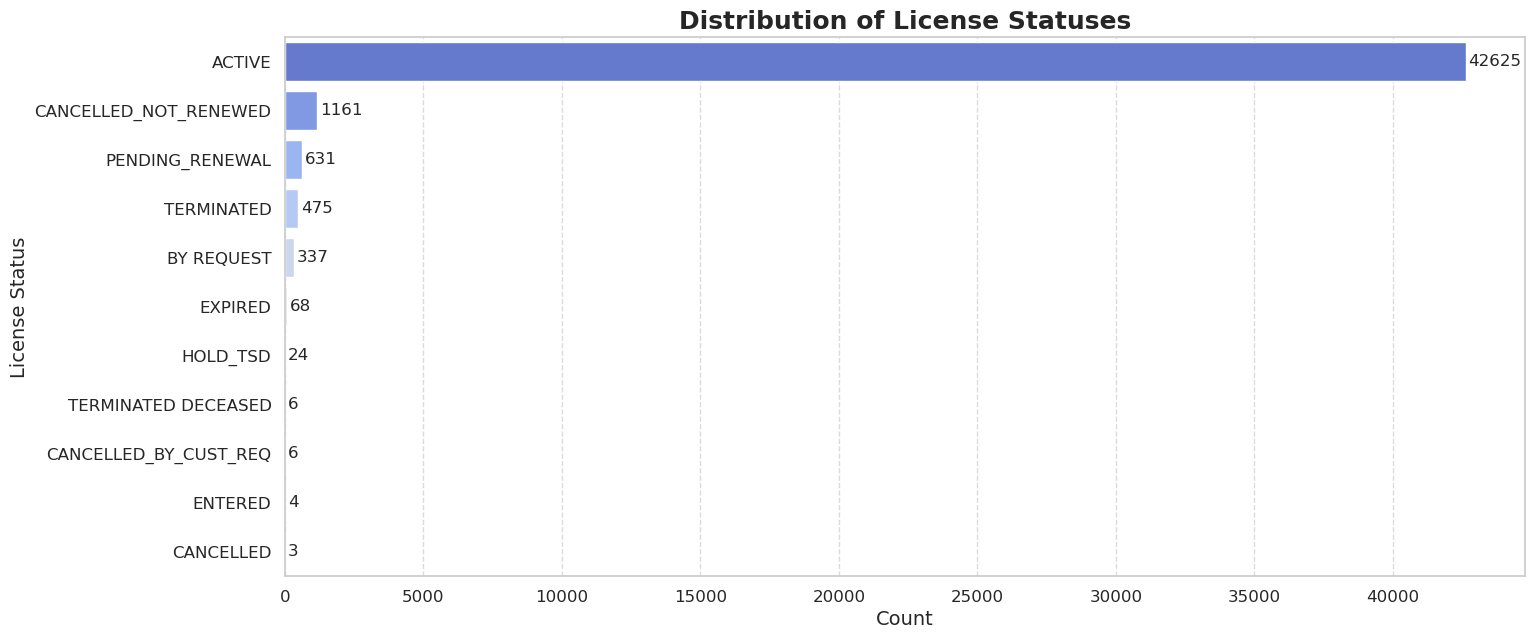

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by count
license_status_counts = license_df['LICENSESTATUS'].value_counts().sort_values(ascending=False)

# Adjust figure size
plt.figure(figsize=(16, 7))

# Create horizontal bar plot for better readability
sns.barplot(y=license_status_counts.index, x=license_status_counts.values, palette='coolwarm')

# Add title and labels
plt.title('Distribution of License Statuses', fontsize=18, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('License Status', fontsize=14)

# Show value labels on bars
for index, value in enumerate(license_status_counts.values):
    plt.text(value + 100, index, str(value), fontsize=12, verticalalignment='center')

# Improve readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


#### **Step 2: Define the Filtering Criteria**  

**Justification:**  
For this analysis, only ACTIVE elevators are considered relevant since they represent operational elevators. Other statuses, such as EXPIRED, CANCELLED_NOT_RENEWED, and TERMINATED, represent elevators no longer in service.

In [39]:
# Define the filtering criteria: retain only 'ACTIVE' licenses
relevant_status = ['ACTIVE']

# Filter the dataframe
filtered_license_df = license_df[license_df['LICENSESTATUS'].isin(relevant_status)].copy()

# Verify the filtering
print("LICENSESTATUS after filtering:")
print(filtered_license_df['LICENSESTATUS'].unique())
print(f"Number of records after filtering: {filtered_license_df.shape[0]}")

LICENSESTATUS after filtering:
['ACTIVE']
Number of records after filtering: 42625


#### **Step 3: Handle Missing or Inconsistent Data (Optional)**

If missing values are present in LICENSESTATUS (not the case here), handle them appropriately:

In [40]:
# Check for missing values in LICENSESTATUS
missing_status_count = license_df['LICENSESTATUS'].isnull().sum()
print(f"Number of missing LICENSESTATUS values: {missing_status_count}")

# If there are missing values, decide on handling strategy
if missing_status_count > 0:
    # Option 1: Drop rows with missing LICENSESTATUS
    # filtered_license_df = filtered_license_df.dropna(subset=['LICENSESTATUS'])
    
    # Option 2: Fill missing values with 'Unknown'
    # filtered_license_df['LICENSESTATUS'].fillna('Unknown', inplace=True)
    
    print("Handled missing LICENSESTATUS values.")
else:
    print("No missing LICENSESTATUS values to handle.")

Number of missing LICENSESTATUS values: 0
No missing LICENSESTATUS values to handle.


#### **Step 4: Summarize and Visualize the Filtered Data**



In [41]:
# Summarizing the filtering process
total_rows_before = license_df.shape[0]
total_rows_after = filtered_license_df.shape[0]
rows_filtered_out = total_rows_before - total_rows_after

print(f"Total rows before filtering: {total_rows_before}")
print(f"Total rows after filtering: {total_rows_after}")
print(f"Rows filtered out: {rows_filtered_out}")


Total rows before filtering: 45340
Total rows after filtering: 42625
Rows filtered out: 2715


**Visualize LICENSESTATUS Distribution (Optional):**

Visualize the distribution of LICENSESTATUS values before and after filtering for additional insights.

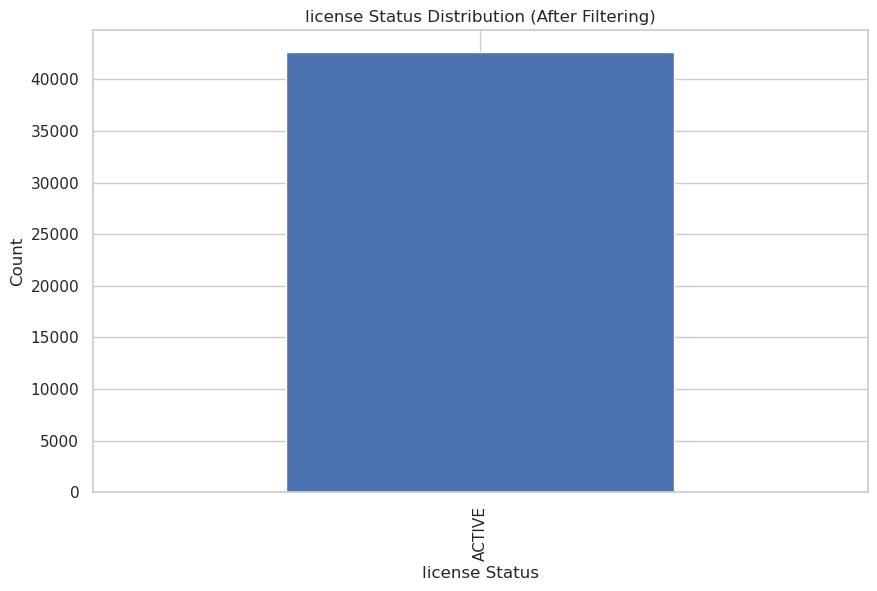

In [42]:


# Visualize LICENSESTATUS distribution after filtering
filtered_status_counts = filtered_license_df['LICENSESTATUS'].value_counts()
filtered_status_counts.plot(kind='bar', figsize=(10, 6), title='license Status Distribution (After Filtering)')
plt.xlabel('license Status')
plt.ylabel('Count')
plt.show()


## **1d. Verifying Uniqueness**

#### **Objective**  
Confirm if ElevatingDevicesNumber is still unique after we filtered.

#### **Approach for 1d: Verifying Uniqueness**

The goal of this step is to ensure the unique identifier (`ElevatingDevicesNumber`) is still unique after filtering the dataset. This is crucial for maintaining the integrity of subsequent analyses.

1. **Identify the Unique Identifier:**  
   Determine the column that uniquely identifies each elevator (`ElevatingDevicesNumber`).

2. **Check Uniqueness:**  
   Use the `.is_unique` property to confirm if the identifier is unique in the filtered dataset.

3. **Interpret the Results:**  
   - If `True`, the identifier is unique, and no further action is required.  
   - If `False`, investigate and resolve any duplicates by exploring their source and relevance.

Let me know if you need additional details or edits!

In [43]:
# Rechecking uniqueness after filtering
is_unique_after_filter = filtered_license_df[common_identifier].is_unique
print(f"Is '{common_identifier}' unique after filtering? {is_unique_after_filter}")

Is 'ElevatingDevicesNumber' unique after filtering? True


## <a id="1e-time-series-plot-of-license-expiry"></a> **1e. Time Series Plot of license Expiry**

#### **Objective**  
Plot a time series showing the count of LICENSE expirations by month.

#### **Approach**  
1. Convert LICENSEEXPIRYDATE to datetime.  
2. Group the data by year and month.  
3. Plot the counts to visualize trends over time.


LICENSEEXPIRYDATE converted to datetime successfully.
Number of invalid date entries: 0


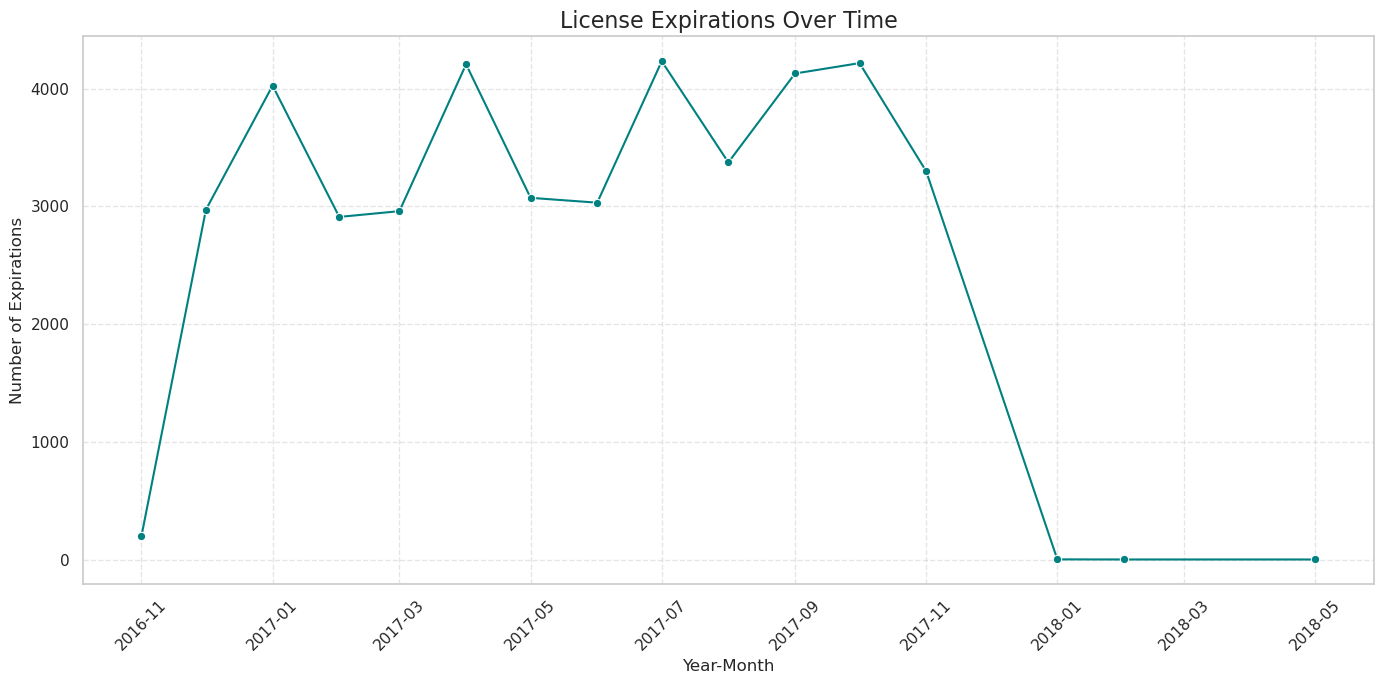

In [44]:
# Convert LICENSEEXPIRYDATE to datetime with specified format
# Assuming the format is 'dd-MMM-yy' (e.g., '28-Apr-17')
license_expiry_format = '%d-%b-%y'

try:
    filtered_license_df['LICENSEEXPIRYDATE'] = pd.to_datetime(filtered_license_df['LICENSEEXPIRYDATE'], format=license_expiry_format)
    print("LICENSEEXPIRYDATE converted to datetime successfully.")
except ValueError as e:
    print(f"Date conversion error: {e}. Attempting to infer formats.")
    filtered_license_df['LICENSEEXPIRYDATE'] = pd.to_datetime(filtered_license_df['LICENSEEXPIRYDATE'], errors='coerce')
    print("Date conversion with inference completed.")

# Check for any NaT values after conversion
nat_count = filtered_license_df['LICENSEEXPIRYDATE'].isnull().sum()
print(f"Number of invalid date entries: {nat_count}")

# Drop rows with invalid dates if any
filtered_license_df.dropna(subset=['LICENSEEXPIRYDATE'], inplace=True)

# Extract month and year for grouping
filtered_license_df['ExpiryMonth'] = filtered_license_df['LICENSEEXPIRYDATE'].dt.month_name()
filtered_license_df['ExpiryYear'] = filtered_license_df['LICENSEEXPIRYDATE'].dt.year

# Group by year and month, then count expirations
expiry_counts = filtered_license_df.groupby(['ExpiryYear', 'ExpiryMonth']).size().reset_index(name='Count')

# Create a 'Year-Month' column for sorting
expiry_counts['YearMonth'] = pd.to_datetime(expiry_counts['ExpiryYear'].astype(str) + '-' + expiry_counts['ExpiryMonth'], format='%Y-%B')

# Sort by 'YearMonth'
expiry_counts.sort_values('YearMonth', inplace=True)

# Plot the time series
plt.figure(figsize=(14, 7))
sns.lineplot(data=expiry_counts, x='YearMonth', y='Count', marker='o', color='teal')
plt.title('License Expirations Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Expirations', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## **1f. Table of Expirations by Year-Month**

#### **Objective**  
Create a table that counts expirations by year and month, with a readable year-month format, and filter for months with more than five expirations.

1. **Create Year-Month Column:** Format dates for aggregation.
2. **Aggregate Data:** Count expirations per year-month.
3. **Filter Based on Threshold:** Retain only records exceeding the specified count.


In [45]:
# Ensure LICENSEEXPIRYDATE is in datetime format
license_df['LICENSEEXPIRYDATE'] = pd.to_datetime(license_df['LICENSEEXPIRYDATE'])

# Create the Expiry_YearMonth column
license_df['Expiry_YearMonth'] = license_df['LICENSEEXPIRYDATE'].dt.to_period('M').astype(str)

# Counting expirations by year and month
expiry_table = license_df.groupby('Expiry_YearMonth').size().reset_index(name='Count')

# Filtering for counts > 5
expiry_table = expiry_table[expiry_table['Count'] > 5]

# Creating a readable 'Year-Month' format (e.g., January 2015)
expiry_table['Year-Month'] = pd.to_datetime(expiry_table['Expiry_YearMonth']).dt.strftime('%B %Y')

# Selecting relevant columns
expiry_table = expiry_table[['Expiry_YearMonth', 'Count', 'Year-Month']]

# Displaying the table
print("License Expirations by Year-Month (Count > 5):")
display(expiry_table)

# Create the 'Expiry_YearMonth' column in 'YYYY-MM' format
filtered_license_df['Expiry_YearMonth'] = filtered_license_df['LICENSEEXPIRYDATE'].dt.to_period('M').astype(str)

# Counting expirations by year and month
expiry_table = filtered_license_df.groupby('Expiry_YearMonth').size().reset_index(name='Count')

# Filtering for counts > 5
expiry_table = expiry_table[expiry_table['Count'] > 5]

# Creating a readable 'Year-Month' format (e.g., January 2015)
expiry_table['Year-Month'] = pd.to_datetime(expiry_table['Expiry_YearMonth']).dt.strftime('%B %Y')

# Selecting and ordering relevant columns
expiry_table = expiry_table[['Expiry_YearMonth', 'Count', 'Year-Month']]

# Displaying the table
print("License Expirations by Year-Month (Count > 5):")
display(expiry_table)


License Expirations by Year-Month (Count > 5):


/tmp/ipykernel_14636/319308576.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  license_df['LICENSEEXPIRYDATE'] = pd.to_datetime(license_df['LICENSEEXPIRYDATE'])


,Expiry_YearMonth,Count,Year-Month
103,1993-09,7,September 1993
104,1993-10,6,October 1993
105,1993-11,6,November 1993
110,1994-04,6,April 1994
130,1996-04,7,April 1996
...,...,...,...
373,2017-07,4358,July 2017
374,2017-08,3543,August 2017
375,2017-09,4153,September 2017
376,2017-10,4233,October 2017


License Expirations by Year-Month (Count > 5):


,Expiry_YearMonth,Count,Year-Month
0,2016-11,199,November 2016
1,2016-12,2972,December 2016
2,2017-01,4025,January 2017
3,2017-02,2910,February 2017
4,2017-03,2959,March 2017
5,2017-04,4206,April 2017
6,2017-05,3072,May 2017
7,2017-06,3031,June 2017
8,2017-07,4232,July 2017
9,2017-08,3373,August 2017


**Notes:**
- The strftime('%B %Y') formats the period to a more readable form, like "April 2017".  
- We can adjust the threshold (> 5) based on our  data distribution and analysis needs.  

In [46]:
# Save the cleaned and filtered license data to a CSV file
output_file = '../data/processed/cleaned_license_data.csv'
filtered_license_df.to_csv(output_file, index=False)
print(f"Cleaned license data saved to '{output_file}'.")

Cleaned license data saved to '../data/processed/cleaned_license_data.csv'.
